In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] =250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [ ]:
corr_matrix = df.corr()

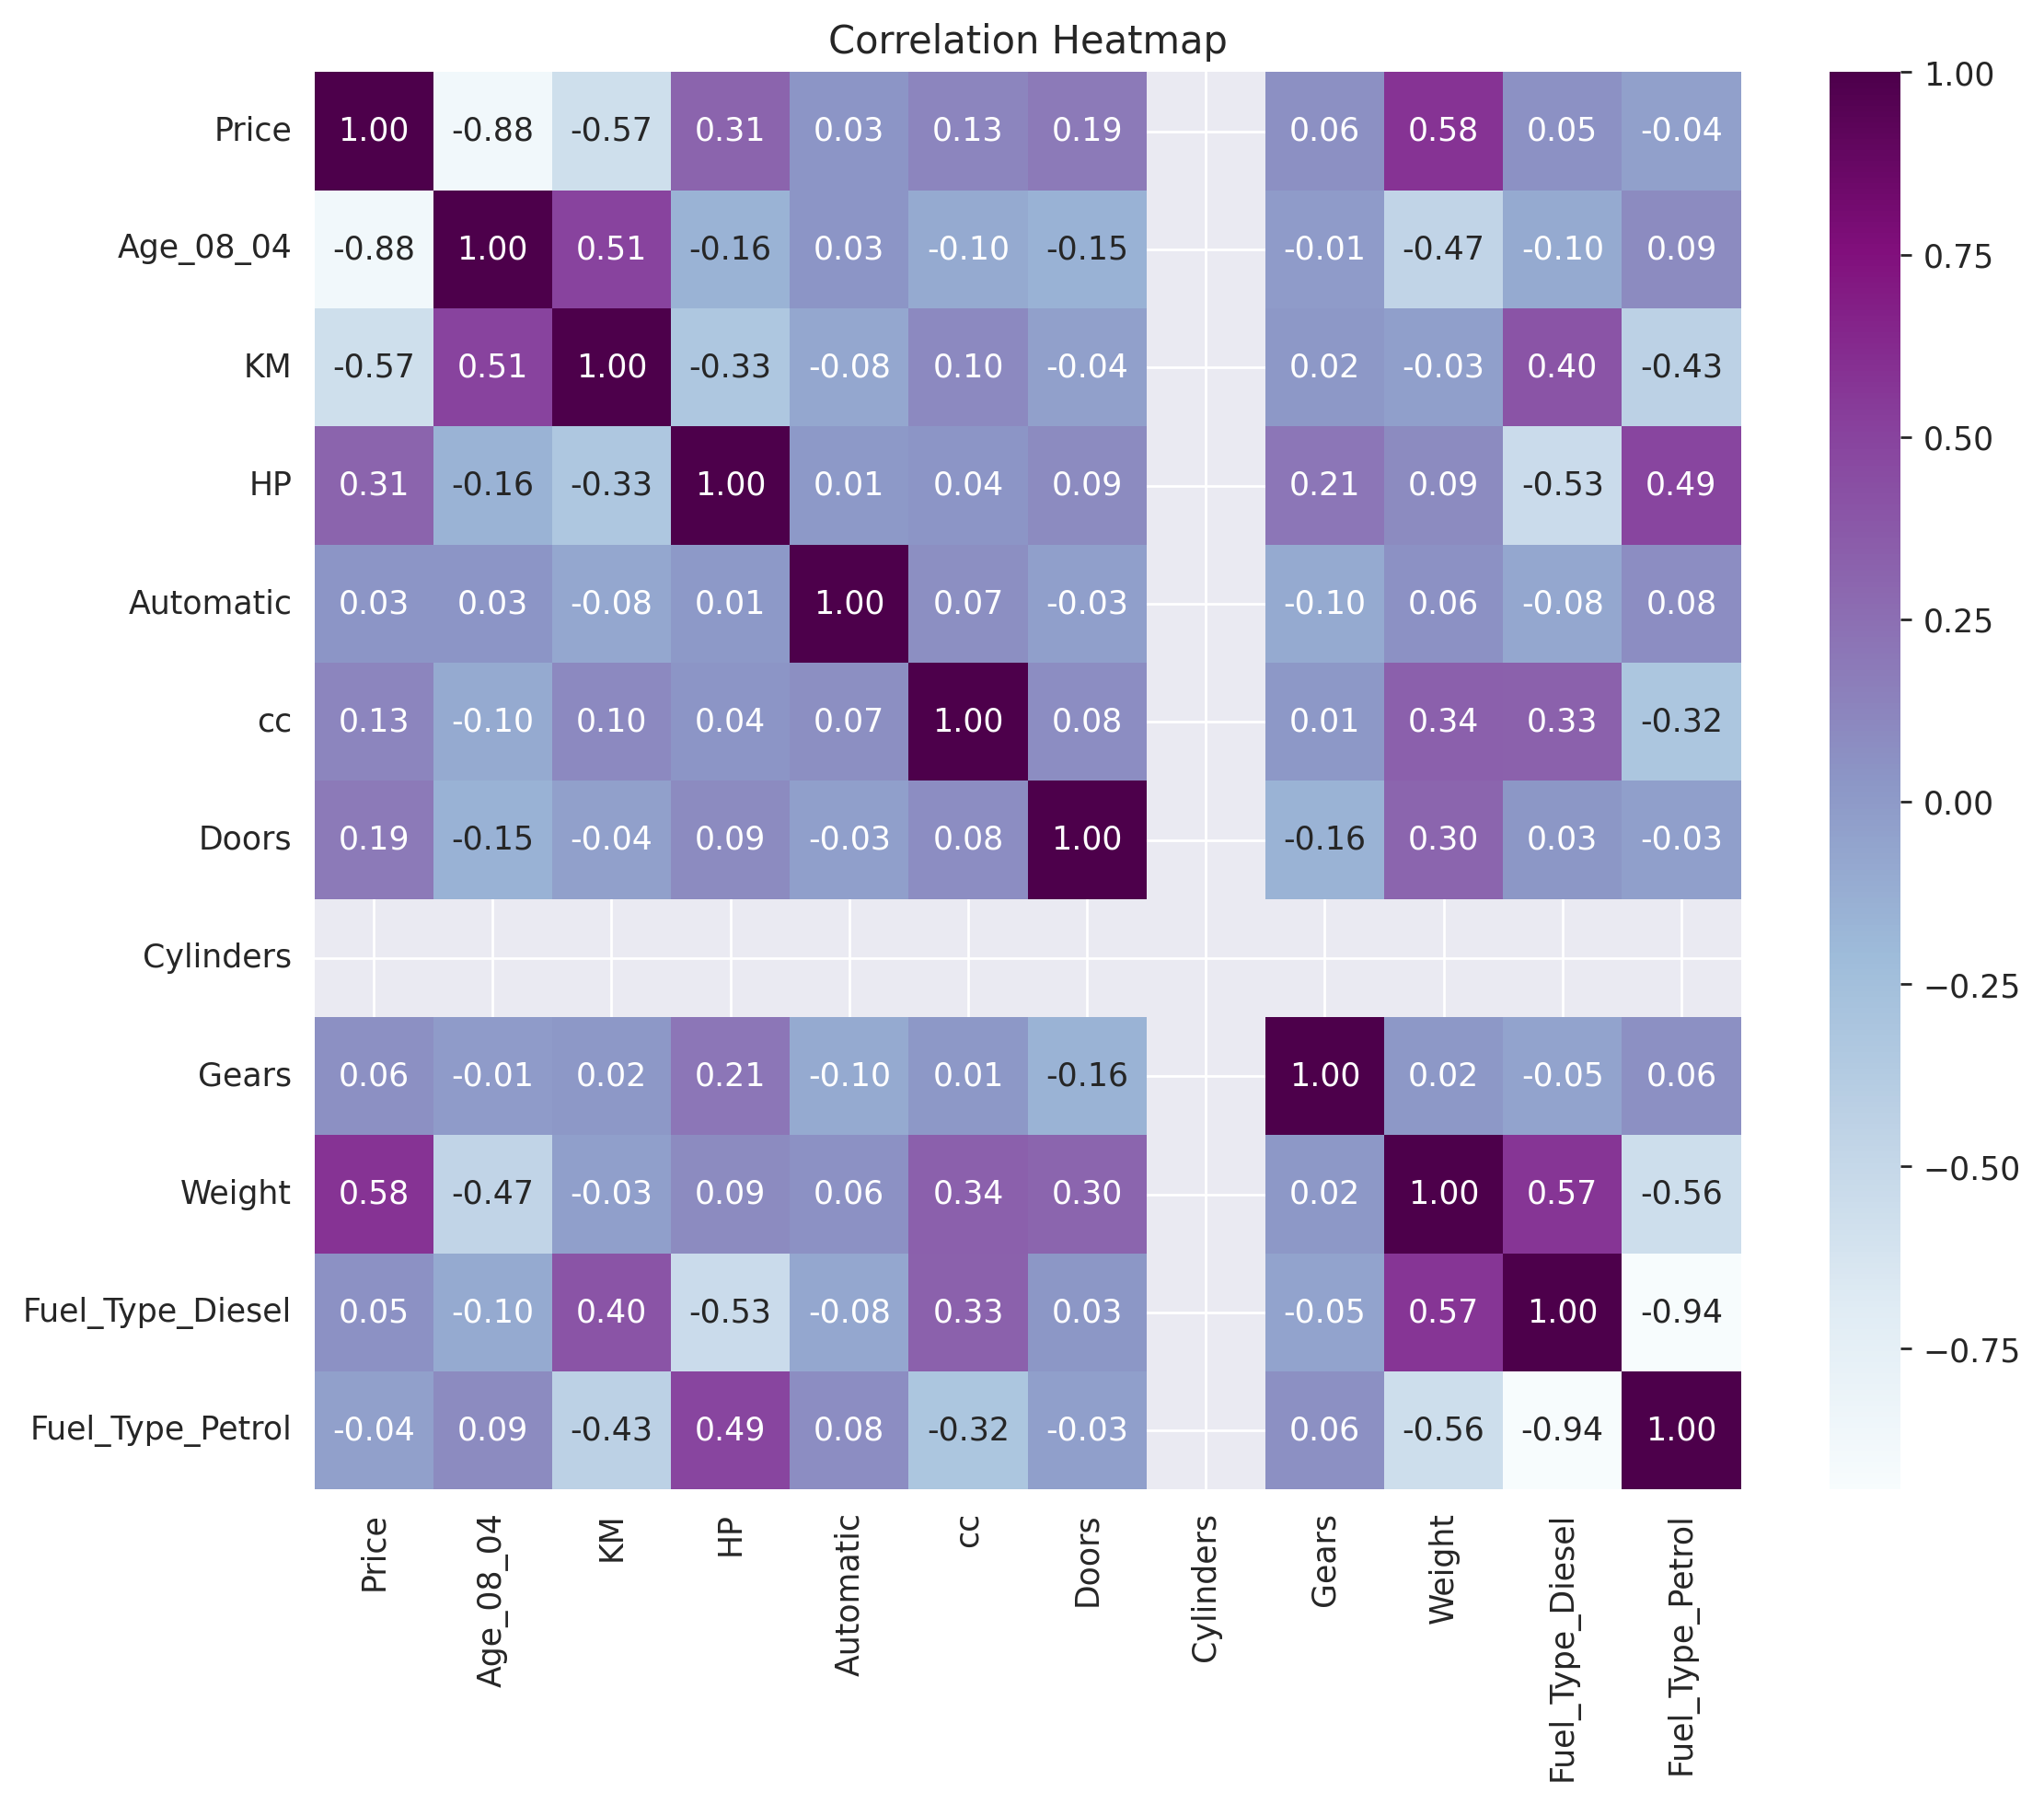

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="BuPu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
X

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,True,False
1,23,72937,90,0,2000,3,4,5,1165,True,False
2,24,41711,90,0,2000,3,4,5,1165,True,False
3,26,48000,90,0,2000,3,4,5,1165,True,False
4,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,4,5,1025,False,True
1432,72,19000,86,0,1300,3,4,5,1015,False,True
1433,71,17016,86,0,1300,3,4,5,1015,False,True
1434,70,16916,86,0,1300,3,4,5,1015,False,True


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
Age_08_04        -1.232622e+02
KM               -1.668162e-02
HP                6.176225e+01
Automatic         4.595427e+02
cc               -3.879261e+00
Doors             9.491968e+00
Cylinders        -1.124079e-11
Gears             4.797822e+02
Weight            1.814428e+01
Fuel_Type_Diesel  3.528463e+03
Fuel_Type_Petrol  1.335855e+03


In [ ]:
model1 = LinearRegression()


model1.fit(X_train, y_train)


print("Model 1 Coefficients:", model1.coef_)

Model 1 Coefficients: [-1.23262175e+02 -1.66816186e-02  6.17622500e+01  4.59542671e+02
 -3.87926071e+00  9.49196820e+00 -1.12407861e-11  4.79782180e+02
  1.81442790e+01  3.52846266e+03  1.33585520e+03]


In [ ]:

X_train_reduced = X_train.drop(columns=['Doors', 'Gears'])
X_test_reduced = X_test.drop(columns=['Doors', 'Gears'])


model2 = LinearRegression()


model2.fit(X_train_reduced, y_train)


print("Model 2 Coefficients:", model2.coef_)

Model 2 Coefficients: [-1.23217302e+02 -1.64385873e-02  6.42910322e+01  4.08498643e+02
 -3.99825177e+00 -3.10862447e-13  1.81506202e+01  3.68422524e+03
  1.40309119e+03]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the model
model3 = LinearRegression()

# Train the model
model3.fit(X_train_poly, y_train)

# Print coefficients
print("Model 3 Coefficients:", model3.coef_)

Model 3 Coefficients: [ 2.98441992e-01  1.42075792e+01 -8.60860070e-03 -2.96632275e+02
  7.00191530e+02  3.30023345e+01 -7.64156957e+02 -2.11922451e-07
 -4.36441332e+02  1.11819517e+01 -3.80775829e+03  3.85301593e+03
 -1.14044755e-02  5.58855062e-04  9.86691820e-01 -3.76985942e+00
 -2.21801958e-01  9.32509434e+00  5.68202870e+01  1.03674452e+02
 -6.35145330e-01  1.32750285e+02 -2.56772359e+01 -9.47594592e-08
  4.71415813e-05 -4.06670930e-03 -6.78754646e-06 -2.10025294e-03
 -3.44009649e-02 -4.95808243e-03  1.27624625e-04  1.88229740e-02
  1.56903519e-02 -2.25120466e+00 -2.20905716e+02  9.86215124e-01
 -5.34618204e+00 -1.18652907e+03  4.14493903e+01  1.02774454e+00
  2.04976735e+03  2.63194169e+03  7.00191527e+02  1.64789507e+01
 -2.05133727e+02  2.80076611e+03 -4.11564142e+03 -2.91521221e-01
  2.18278728e-11  7.29877031e+03 -8.47302828e-02 -2.80291333e-01
  1.32009342e+02 -9.44843974e+00 -1.06002023e-01 -1.15135763e+02
 -2.31178395e+02 -3.64763486e+02 -3.05662783e+03  2.18987274e+03
  4

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test_reduced)
y_pred3 = model3.predict(X_test_poly)

# Model 1 Evaluation
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)
print(f"Model 1: MSE = {mse1}, R-squared = {r2_1}")

# Model 2 Evaluation
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)
print(f"Model 2: MSE = {mse2}, R-squared = {r2_2}")

# Model 3 Evaluation
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)
print(f"Model 3: MSE = {mse3}, R-squared = {r2_3}")


Model 1: MSE = 12831346.695309361, R-squared = 0.08911535462520226
Model 2: MSE = 13541396.201795368, R-squared = 0.038709640535153356
Model 3: MSE = 1064331111190.2489, R-squared = -75554.81575333004


In [ ]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with alpha (regularization strength)
lasso = Lasso(alpha=0.1)

# Train the model
lasso.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression: MSE = {mse_lasso}, R-squared = {r2_lasso}")


Lasso Regression: MSE = 12740130.7725702, R-squared = 0.09559068300730955


In [ ]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model with alpha (regularization strength)
ridge = Ridge(alpha=0.1)

# Train the model
ridge.fit(X_train, y_train)

# Predictions and evaluation
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression: MSE = {mse_ridge}, R-squared = {r2_ridge}")


Ridge Regression: MSE = 12557450.699162386, R-squared = 0.10855896122739273


What is Normalization?

->Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

What is Standardization?

-> Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.

How is it helpful?
->
Without scaling, models can behave weirdly because:

* Some features may dominate others (e.g., income in thousands vs. age in years)

* Gradient descent may converge slowly or get stuck (especially in neural networks)

* Distance-based models (like KNN, K-means, SVM) can be biased toward higher-magnitude features.

* Poor performance or even failure to learn can happen in models sensitive to feature scales

What are the techniques can be used to address multicollinearity in multiple linear regression?

->VIF	:Detects multicollinearity

Drop Features:	Removes one of the correlated features

PCA	Transforms :data into uncorrelated components

Ridge/Lasso:	Penalize large coefficients

Combine Features:	Simplifies the model